In [8]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [9]:
#!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
#read the csv file
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [13]:
#Dataset count based on customer category
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0A4E4890>]],
      dtype=object)

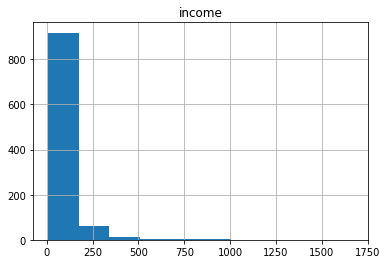

In [16]:
df.hist(column='income')

In [17]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [27]:
x = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values
x[0:3]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.]])

In [28]:
y = df['custcat'].values
y[0:3]

array([1, 4, 3], dtype=int64)

In [29]:
#Data standadization - converted to zscore (normalizing the data)
x = preprocessing.StandardScaler().fit(x).transform(x.astype('float'))
x[0:3]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004]])

In [31]:
#Splitting data into train and test set
from sklearn.model_selection import train_test_split
#80 % is train set and 20% is test set
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)
print("Train set: ", x_train.shape, y_train.shape)
print("Test set: ", x_test.shape, y_test.shape)

Train set:  (800, 11) (800,)
Test set:  (200, 11) (200,)


In [34]:
#Classifier to implement KNN
from sklearn.neighbors import KNeighborsClassifier

In [40]:
#initialize k  to 4
k = 4
# Fitting the training model
regressor = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
regressor

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [42]:
#Predict based on test data
y_hat = regressor.predict(x_test)
y_hat[0:3]

array([1, 1, 3], dtype=int64)

In [45]:
#Accuracy Evaluation
from sklearn import metrics
print("Train set accuracy: ",metrics.accuracy_score(y_train, regressor.predict(x_train)))
print("Test set accuracy: ",metrics.accuracy_score(y_test, y_hat))

Train set accuracy:  0.5475
Test set accuracy:  0.32


In [53]:
# Calculate accuracy of KNN for different values of k
ks = 10
#initialize mean_acc and std_acc
mean_acc = np.zeros(ks-1)
std_acc = np.zeros(ks-1)
ConfusionMatrix = []

for n in range (1,ks):
    regressor = KNeighborsClassifier(n_neighbors = n).fit(x_train, y_train)
    yhat = regressor.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test,yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc    

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

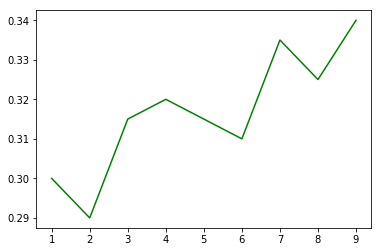

In [54]:
#Plot the accuracy of models for different k values
plt.plot(range(1,ks), mean_acc,'g')


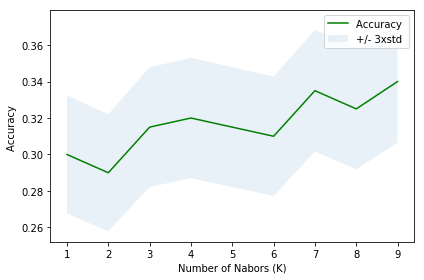

In [57]:
#Plot the accuracy of models for different k values
plt.plot(range(1,ks), mean_acc,'g')
plt.fill_between(range(1,ks), mean_acc-1 * std_acc, mean_acc+1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()


In [58]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k= 9
